In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

def softmax(z):
    exp_z=np.exp(z-np.max(z,axis=1,keepdims=True))
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)

def cross_entropy_loss(y_true,y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))



In [15]:
iris=load_iris()
x=iris.data
y=iris.target.reshape(-1,1)
encoder=OneHotEncoder()
y_ohe=encoder.fit_transform(y).toarray()
y_ohe.shape

(150, 3)

In [24]:
lr=0.05
epochs=5000
n_samples,n_features=x.shape
n_classes=y_ohe.shape[1]
w=np.random.randn(n_features,n_classes)*0.01
b=np.zeros((1,n_classes))
marks={}
for epoch in range(epochs):
    #forward
    z=np.dot(x,w)+b
    y_pred=softmax(z)
    loss=cross_entropy_loss(y_ohe,y_pred)
    marks[epoch]=loss
    if epoch%500==0:
        print(f"Epoch {epoch}, loss:{loss:.4f}, weight: w1:{w[0]}, w2:{w[1]}, w3:{w[2]}, w4:{w[3]}")

    #backprop
    dz=(y_pred-y_ohe)/n_samples
    dw=np.dot(X.T,dz)
    db=np.sum(dz,axis=0,keepdims=True)

    w-=lr*dw
    b-=lr*db

def predict(X,w,b):
    z=np.dot(X,w)+b
    y_pred=softmax(z)
    return np.argmax(y_pred,axis=1)

y_pred_labels=predict(x,w,b)
print("Training accuracy:",accuracy_score(y,np.array(y_pred_labels).reshape(-1,1)))
    

Epoch 0, loss:1.1137, weight: w1:[-0.01000215 -0.01544771  0.0118803 ], w2:[0.00316943 0.00920859 0.00318728], w3:[ 0.00856831 -0.00651026 -0.01034243], w4:[ 0.00681595 -0.0080341  -0.0068955 ]
Epoch 500, loss:0.2440, weight: w1:[ 0.48258811  0.37709348 -0.87325115], w2:[ 1.23273662 -0.29691623 -0.9202551 ], w3:[-1.71782323  0.08494749  1.62459136], w4:[-0.78709316 -0.47400317  1.25298269]
Epoch 1000, loss:0.1747, weight: w1:[ 0.65920684  0.55639797 -1.22917437], w2:[ 1.61649988 -0.27466056 -1.32627403], w3:[-2.22106032 -0.02527692  2.23805286], w4:[-1.0231543  -0.78414347  1.79918413]
Epoch 1500, loss:0.1441, weight: w1:[ 0.77906969  0.65382581 -1.44646507], w2:[ 1.86942932 -0.23621122 -1.61765281], w3:[-2.55467433 -0.08956609  2.63595604], w4:[-1.1820775  -0.99329347  2.16725732]
Epoch 2000, loss:0.1266, weight: w1:[ 0.87035473  0.71611026 -1.60003456], w2:[ 2.05859091 -0.19706607 -1.84595954], w3:[-2.80541699 -0.13232092  2.92945353], w4:[-1.30292911 -1.1532734   2.44808886]
Epoch 2

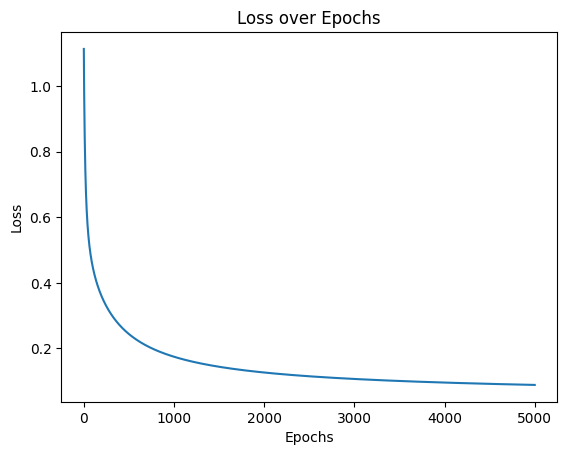

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=list(marks.keys()),y=list(marks.values()))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()